In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("education.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  240 non-null    object 
 1   Life_Expectancy          240 non-null    float64
 2   Infant_Mortality         240 non-null    float64
 3   Fertility_Rate           240 non-null    float64
 4   Mortality_rate_under_5   240 non-null    float64
 5   Population_Ages_65_plus  240 non-null    float64
 6   Health_Expenditure_GDP   240 non-null    float64
 7   Out_of_Pocket_Exp        240 non-null    float64
 8   Age_Dependency_Ratio     240 non-null    float64
 9   Category                 240 non-null    object 
dtypes: float64(8), object(2)
memory usage: 18.9+ KB


In [3]:
X = df.drop(columns = ['country', 'Category'])
X = X.fillna(0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Life_Expectancy          240 non-null    float64
 1   Infant_Mortality         240 non-null    float64
 2   Fertility_Rate           240 non-null    float64
 3   Mortality_rate_under_5   240 non-null    float64
 4   Population_Ages_65_plus  240 non-null    float64
 5   Health_Expenditure_GDP   240 non-null    float64
 6   Out_of_Pocket_Exp        240 non-null    float64
 7   Age_Dependency_Ratio     240 non-null    float64
dtypes: float64(8)
memory usage: 15.1 KB


In [4]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [6]:
df.loc[X.index, 'Cluster_ID'] = clusters

In [7]:
means = df.groupby('Cluster_ID')[X.columns].mean()

In [8]:
nazwy_klastrow = {
    0: 'Developed',
    1: 'Struggling',
    2: 'Developing',
    3: 'Medical Hub'
}

df['Cluster_Name'] = df['Cluster_ID'].map(nazwy_klastrow)

In [29]:
id_developed = means['Secondary_Enrollment'].idxmax()
if means['Secondary_Enrollment'].idxmax() == id_developed:
    # Szukamy innej cechy charakterystycznej dla Hubów, np. najwyższe Usługi
    id_hubs = means['Patents_NonResidents'].idxmax() 
else:
    id_hubs = means['Scientific_Articles'].idxmax()

# c) Grupa z najwyższym udziałem Rolnictwa to "Developing"
id_developing = means['Secondary_Enrollment'].idxmin()

# d) Grupa "Struggling" to ta, która została (często wysokie bezrobocie/przekazy pieniężne)
all_ids = set(means.index)
used_ids = {id_developed, id_hubs, id_developing}
# Bierzemy pozostałe ID (powinno być jedno, jeśli klastrów jest 4)
remaining = list(all_ids - used_ids)
id_struggling = remaining[0] if remaining else -1 # Zabezpieczenie

# Tworzymy słownik mapujący numery na nazwy
names_map = {
    id_developed: "Developed",
    id_hubs: "Global Hubs",
    id_developing: "Developing",
    id_struggling: "Struggling"
}

In [9]:
nazwy_klastrow = {
    0: 'Developed',
    1: 'Struggling',
    2: 'Developing',
    3: 'Medical Hub'
}

df['Cluster_Name'] = df['Cluster_ID'].map(nazwy_klastrow)
df.head()

,country,Life_Expectancy,Infant_Mortality,Fertility_Rate,Mortality_rate_under_5,Population_Ages_65_plus,Health_Expenditure_GDP,Out_of_Pocket_Exp,Age_Dependency_Ratio,Category,Cluster_ID,Cluster_Name
0,Afghanistan,66.035000,50.400000,4.840000,55.500000,2.400970,23.088169,77.946152,82.776848,Country,3.0,Medical Hub
1,Africa Eastern and Southern,65.146154,37.919755,4.223820,53.806252,3.330960,5.657045,16.289885,78.438051,Region,3.0,Medical Hub
2,Africa Western and Central,58.855722,53.337216,4.497707,88.726335,2.987953,4.219883,60.872130,79.802337,Region,3.0,Medical Hub
3,Albania,79.602000,8.300000,1.348000,9.400000,16.922756,6.193681,51.260521,50.974294,Country,2.0,Developing
4,Algeria,76.261000,19.700000,2.766000,22.000000,6.582212,3.623043,49.975849,58.506783,Country,1.0,Struggling


In [ ]:
df['Cluster_Name'] = df['Cluster_ID'].map(names_map)
df['Cluster_Name'] = df['Cluster_Name'].fillna("Developed")
# 6. Zapisz wynik lub wyświetl
print("Przykład przypisania:")
print(df[['country', 'Cluster_Name', 'Secondary_Enrollment']].head(30))

Przykład przypisania:
                        country Cluster_Name  Secondary_Enrollment
0                   Afghanistan   Struggling             57.357849
1   Africa Eastern and Southern   Struggling             45.606079
2    Africa Western and Central   Struggling             46.300491
3                       Albania    Developed            108.355392
4                       Algeria    Developed            105.164132
5                American Samoa   Struggling                   NaN
6                       Andorra    Developed            101.923820
7                        Angola   Struggling             51.483905
8           Antigua and Barbuda    Developed            108.880779
9                    Arab World   Struggling             68.894547
10                    Argentina    Developed            105.574584
11                      Armenia    Developed             90.945871
12                        Aruba    Developed            124.379367
13                    Australia    Devel

In [ ]:
df.to_csv('education_clustered_final.csv', index=False)

In [19]:
df = pd.read_csv("education_clustered_final.csv")
df = df.drop(columns=['Category', 'country'])
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 3 to 265
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tertiary_Enrollment       142 non-null    float64
 1   Internet_Usage            142 non-null    float64
 2   Patents_NonResidents      142 non-null    float64
 3   Scientific_Articles       142 non-null    float64
 4   Primary_Completion_Rate   142 non-null    float64
 5   Gov_Expenditure_Educ_GDP  142 non-null    float64
 6   Secondary_Enrollment      142 non-null    float64
 7   Compulsory_Years          142 non-null    float64
 8   Cluster_ID                142 non-null    float64
 9   Cluster_Name              142 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.2+ KB


C:\Users\Dawid\AppData\Local\Temp\ipykernel_4284\1939037808.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wpływ (%)', y='Cecha', data=importance_df, palette='viridis')


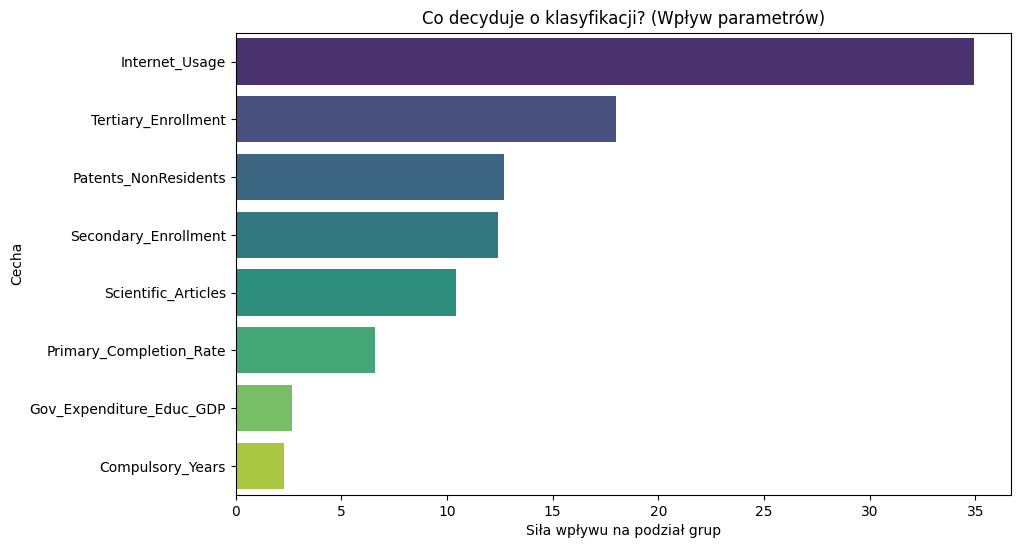

Najważniejsze 3 cechy to:
                  Cecha  Wpływ (%)
1        Internet_Usage  34.929202
0   Tertiary_Enrollment  17.993725
2  Patents_NonResidents  12.709527


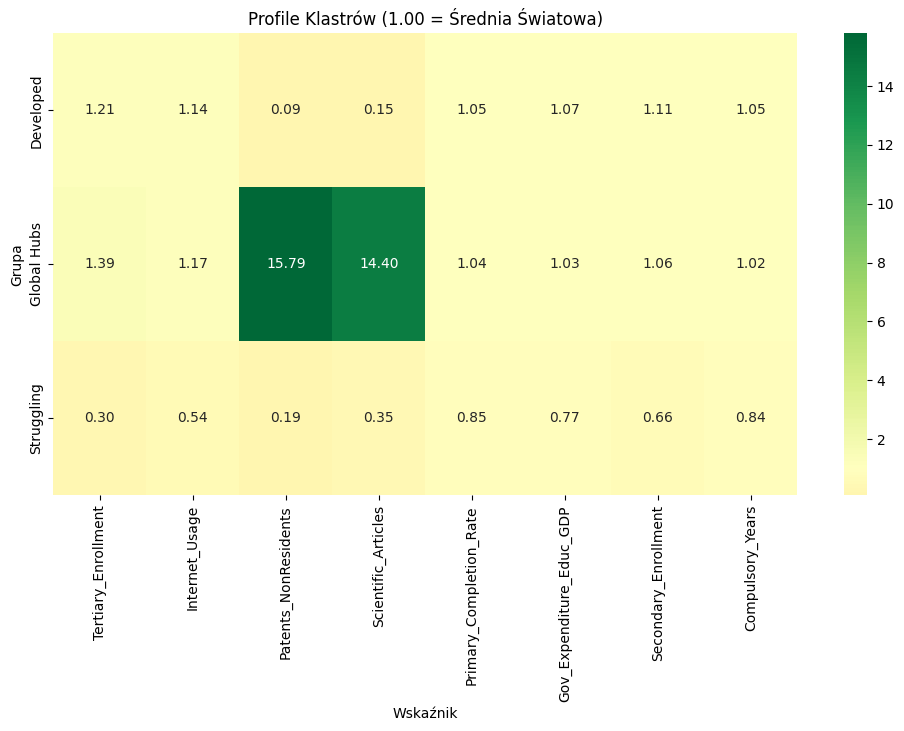

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

features = [
    'Tertiary_Enrollment',
    'Internet_Usage',
    'Patents_NonResidents',
    'Scientific_Articles',
    'Primary_Completion_Rate',
    'Gov_Expenditure_Educ_GDP',
    'Secondary_Enrollment',
    'Compulsory_Years'
]
# --- KONFIGURACJA ---
# Upewnij się, że masz te zmienne z poprzednich kroków:
# df - Twoja główna tabela
# features - lista kolumn użytych do klastrowania
# 'Cluster_Name' - kolumna z nazwami grup

# 1. KTÓRE PARAMETRY SĄ NAJWAŻNIEJSZE? (Feature Importance)
# Trenujemy szybki model klasyfikacji, żeby "zrozumiał", jak powstały klastry
X = df[features].fillna(0)
y = df['Cluster_ID'] # Używamy ID, bo jest cyfrą

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Tworzymy tabelę ważności
importance_df = pd.DataFrame({
    'Cecha': features,
    'Wpływ (%)': rf.feature_importances_ * 100
}).sort_values(by='Wpływ (%)', ascending=False)

# Rysujemy wykres
plt.figure(figsize=(10, 6))
sns.barplot(x='Wpływ (%)', y='Cecha', data=importance_df, palette='viridis')
plt.title('Co decyduje o klasyfikacji? (Wpływ parametrów)')
plt.xlabel('Siła wpływu na podział grup')
plt.show()

print("Najważniejsze 3 cechy to:")
print(importance_df.head(3))


# 2. PROFILOWANIE KLASTRÓW (Heatmapa - Jak bardzo różnią się od średniej?)
# Obliczamy średnie dla każdej grupy
cluster_means = df.groupby('Cluster_Name')[features].mean()

# Obliczamy średnią globalną (dla całego świata)
global_means = df[features].mean()

# Obliczamy różnicę w procentach (np. 1.5 oznacza 150% średniej światowej)
# To pozwala porównać ze sobą różne jednostki (dolary, procenty, lata)
relative_profile = cluster_means / global_means

# Rysujemy Heatmapę
plt.figure(figsize=(12, 6))
sns.heatmap(relative_profile, annot=True, fmt=".2f", cmap="RdYlGn", center=1)
plt.title('Profile Klastrów (1.00 = Średnia Światowa)')
plt.ylabel('Grupa')
plt.xlabel('Wskaźnik')
plt.show()